# Reševanje enačb

* ekstra vsebine za projekt: .exe dokument (grafični vmesnik), spletna str. u pythoni...

** bomo reševali z sympy - ko želimo rešit, enačbe, odvode - lahko odpove -> numerične metode (bolj hitro)**
* **V projektu ne uporabljaj sympya za iskanje ničel!!!!!!!!! - to je prvo uprašanje - simbolno uprašanje**

### Naloga 1
* notranji upogibni moment (tlak v krilu letala)
# SYMPY rešitev

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
x = sym.symbols('x')
m_sym = -20*x**3 + 24.0*x**2 - 4.2*x + 0.2

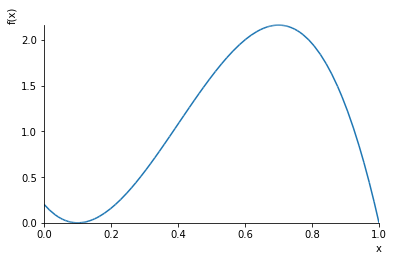

In [3]:
sym.plot(m_sym, (x, 0, 1)) #2 ničli - na koncu je upogibni moment enak 0!!

In [4]:
nicle = sym.solve(m_sym) #ni treba delt sym.Eq če je enačba=0
nicle

[0.100000000000000, 1.00000000000000]

# Bisekcijska metoda
* ### Vprašanje 1

In [5]:
def bisekcija(fun, x1, x2, tol=1e-6): #kopirano iz pastebina
    if np.sign(fun(x1)) != np.sign(fun(x2)):
        n = int(np.ceil(np.log(np.abs(x2-x1)/tol) / np.log(2))) #mora biti celo število zaokroženo navzgor in INT 2.4 -> 3
        for i in range(min([n, maxiter])):
            x3 = (x1 + x2) / 2
            if np.sign(fun(x1)) == np.sign(fun(x3)):
                x1 = x3
            else:
                x2 = x3
        return x3
    else:
        raise Exception('Napačen začetni približek!')
 

In [6]:
m_sym

-20*x**3 + 24.0*x**2 - 4.2*x + 0.2

In [7]:
def M(x):
    return -20*x**3 + 24.0*x**2 - 4.2*x + 0.2 #naredi z lambdify ne z kopiranjem

In [8]:
from scipy.optimize import bisect
bisect(M, 0, 0.2) #ne najde ker ne spremeni predznaka

ValueError: f(a) and f(b) must have different signs

In [9]:
bisect(M, 0.9, 1.1)

0.9999999999985448

*  ### Vprašanje 2 - na tabli
* ekstremi - odvod=0

In [10]:
m_sym.diff(x)

-60*x**2 + 48.0*x - 4.2

In [11]:
def dM(x):
    return -60*x**2 + 48.0*x - 4.2

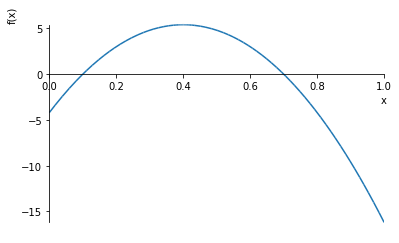

In [15]:
sym.plot(dM(x), (x, 0, 1))

In [16]:
bisect(dM, 0, 0.2)

0.09999999999854482

In [17]:
bisect(dM, 0.6, 0.8)

0.6999999999985448

In [18]:
#ker je biu ekstrem v točki prej ni najdlo!!

### Vprašanje 3

In [19]:
def fun(t): #nihanje
    return np.cos(np.pi*t)

In [20]:
fun = lambda t: np.cos(np.pi*t)

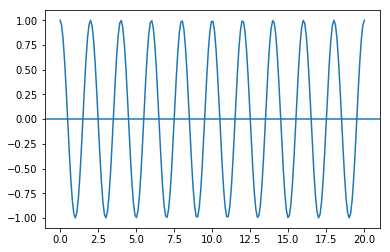

In [21]:
t = np.linspace(0, 20, 200) #20 ničel!
plt.plot(t, fun(t))
plt.axhline(y=0)

In [22]:
#intervali = [(0, 1), (1, 2), ... ] - ne bomo ročno
intervali = [(x1, x1+1) for x1 in range(20)]
intervali

[(0, 1),
 (1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (9, 10),
 (10, 11),
 (11, 12),
 (12, 13),
 (13, 14),
 (14, 15),
 (15, 16),
 (16, 17),
 (17, 18),
 (18, 19),
 (19, 20)]

In [23]:
for x1, x2 in intervali: #spodnja meja x1, zgornja meja x2
    print(bisect(fun, x1, x2))

0.500000000001819
1.500000000001819
2.500000000001819
3.500000000001819
4.500000000001819
5.500000000001819
6.499999999998181
7.500000000001819
8.499999999998181
9.500000000001819
10.499999999998181
11.500000000001819
12.499999999998181
13.500000000001819
14.499999999998181
15.500000000001819
16.50000000000182
17.50000000000182
18.50000000000182
19.50000000000182


In [24]:
ničle_bisekcija = np.array([bisect(fun, x1, x2) for x1, x2 in intervali]) #izpeljevanje seznamov
ničle_bisekcija

array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5])

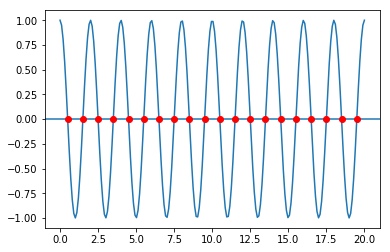

In [25]:
t = np.linspace(0, 20, 200) #20 ničel!
plt.plot(t, fun(t))
plt.axhline(y=0)
plt.plot(ničle_bisekcija,fun(ničle_bisekcija), 'ro')

### Vprašanje 4
* ridderjeva metoda - izpeljana iz sekantne

In [26]:
from scipy.optimize import ridder

In [27]:
ridder_ničle = np.array([ridder(fun, x1, x2) for x1, x2 in intervali])
ridder_ničle

array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5])

In [57]:
%%timeit
ničle_bisekcija = np.array([bisect(fun, x1, x2) for x1, x2 in intervali]) #ne pogleda ali smo že pri ničli - nepotrebni koraki

867 µs ± 3.53 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [58]:
%%timeit
ridder_ničle = np.array([ridder(fun, x1, x2) for x1, x2 in intervali]) #veliko hitreje

154 µs ± 121 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Sekantna metoda
* odprta metoda

In [28]:
def sekantna(fun, x1, x2, tol=1e-5, maxiter=50): #kopirano iz pastebina
    for i in range(maxiter): #maxiter -> če ne najde ničle da ne računa v neskončnost!!
        x3 = x2 + fun(x2) * (x2 - x1) / (fun(x1) - fun(x2))
        if np.abs(x3 - x2) < tol:
            return x3
        x1 = x2
        x2 = x3
    return x3

### vprašanje 5

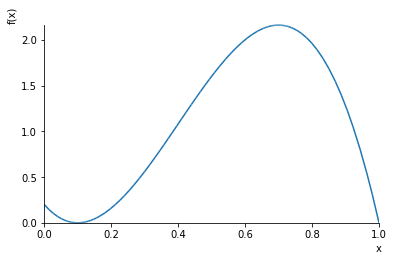

In [29]:
m_sym
sym.plot(m_sym, (x, 0, 1))

In [30]:
fun = sym.lambdify(x, m_sym, 'numpy')
sekantna(fun, 0.05, 0.06) #te ničle bisekcija ni mogla izračunat!! - prednost pred bisekcijo

0.099989150825575648

In [31]:
sekantna(fun, 0.4, 0.5) #najde isto??

0.10001579334507299

In [32]:
sekantna(fun, 0.8, 0.85) #more že bit naklon dol

1.0000000000411609

In [33]:
sekantna(fun, 0.4, 0.8)

0.099989722942518205

### vprašanje 6
* nek nosilček

tanh(beta*l)=tan(beta*l) -> tanh(beta*l) - tan(beta*l) = 0

In [34]:
def funk(x):
    return np.tanh(x) - np.tan(x)

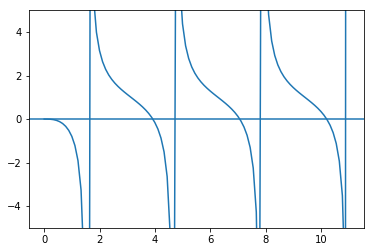

In [35]:
območje = np.linspace(0, 11, 100)
plt.plot(območje, funk(območje))
plt.ylim(-5, 5)
plt.axhline()

In [36]:
from scipy.optimize import newton

In [37]:
priblizek = [4, 7, 10]
ničle = [newton(funk, i) for i in priblizek]
ničle

[3.9266023120479212, 7.0685827456287313, 10.21017612281303]

In [38]:
obmocja = [(3,4), (5,7.5), (8,10.5)]
ničle = [bisect(funk, x1, x2) for i in obmocja] #?? je najdlo ničle naprej??
ničle

[19.63495408493509, 19.63495408493509, 19.63495408493509]

In [39]:
bisect(funk, 1, 3) #to je pol!

1.5707963267941523

# Newtonova metoda

In [40]:
def newton_raphson(fun, x0, dfun, tol=1e-5, maxiter=50): #na pastebin
    for i in range(maxiter):
        x1 = x0 - fun(x0) / dfun(x0)
        if np.abs(x1 - x0) < tol:
            return x1
        x0 = x1
    return x0

### Vprašanje 7

In [41]:
x = sym.symbols('x')
f_sym = sym.tanh(x) - sym.tan(x)
zacetni_priblizki = [2, 6, 10]

In [42]:
f_sym

-tan(x) + tanh(x)

In [43]:
sym.solve(f_sym) #simbolno ne zna rešit! -> numerične metode

NotImplementedError: multiple generators [exp(x), tan(x)]
No algorithms are implemented to solve equation (exp(x) - exp(-x))/(exp(x) + exp(-x)) - tan(x)

In [44]:
df_sym = sym.diff(f_sym, x)
df = sym.lambdify(x, df_sym, 'numpy') #spremenimo v numpy funkcijo - da lahko računamo - na x osi je x, df_sym je na y osi
fun = sym.lambdify(x, f_sym, 'numpy')

In [45]:
[newton(fun, x0, fprime=df) for x0 in zacetni_priblizki] #če dodamo še drugi metod = hejlova metoda - še hitreje

[3.926602312047919, 7.0685827456287322, 10.21017612281303]

### vprašanje 9
* sistemi nelinearnih enačb (nemoremo z matrikami)
* sin(x) + y + 2 = 0
* 2^x + 3y = 0

In [46]:
from scipy.optimize import root

In [47]:
def sistem(x): #v tem x je y in x spravljen (neznanje) - FUNKCIJA SPREJME SEZNAM NEZNANK
    x, y = x[0], x[1]  #razpakiramo x
    return np.sin(x) + y + 2, 2**x + 3*y

In [48]:
root(sistem, x0=(0,0)) #success = false - ni uspelo - napačne rešitve

    fjac: array([[-0.31145748, -0.95026009],
       [ 0.95026009, -0.31145748]])
     fun: array([ 0.79856856, -0.25806533])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 34
     qtf: array([-0.00349097,  0.83922421])
       r: array([-0.25971796, -3.14643078, -0.01393365])
  status: 5
 success: False
       x: array([-1.48903389, -0.20477212])

In [49]:
rešitev = root(sistem, x0=(2,0)) #prave rešitve
rešitev

    fjac: array([[-0.18818469,  0.98213366],
       [-0.98213366, -0.18818469]])
     fun: array([ -4.09894341e-13,   1.32427402e-12])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([ -3.66698793e-09,  -4.05991426e-10])
       r: array([ 4.79807838,  2.28213691, -1.59958451])
  status: 1
 success: True
       x: array([ 2.80529121, -2.32999799])

In [50]:
rešitev.x

array([ 2.80529121, -2.32999799])

In [51]:
sistem(rešitev.x) #zelo blizu x

(-4.0989434069160779e-13, 1.3242740237728867e-12)

In [52]:
def sistem2(x, E):
    x, y = x[0], x[1]
    return np.sin(x) + y + 2, 2**x + 3*y + 3*y*E

In [53]:
E = 2.1e5

In [54]:
rešitev = root(sistem2, x0=(2,0))
rešitev #mu manka E

TypeError: sistem2() missing 1 required positional argument: 'E'

In [55]:
rešitev = root(sistem2, x0=(2,0), args=(E)) #podamo dodatne parametre
rešitev

    fjac: array([[-0.00579681, -0.9999832 ],
       [ 0.9999832 , -0.00579681]])
     fun: array([  9.99999540e-01,  -1.37757431e-04])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 54
     qtf: array([-0.00673802,  0.99997767])
       r: array([ -2.33551988e-01,  -6.29967012e+05,  -3.80250192e+03])
  status: 5
 success: False
       x: array([ -1.57041028e+00,  -5.34680599e-07])